# Práctica: Machine Learning 
## Autor: Rubén Cerezo
El  objetivo de la práctica es simple: abordar un problema de Machine Learning realista 
siguiendo la metodología y buenas prácticas explicadas durante las clases teóricas. Por 
tanto, en estas instrucciones no se especifican los pasos exactos que el alumno tiene que 
llevar a cabo para realizar esta tarea con éxito; es parte del trabajo aplicar las técnicas de 
procesamiento/transformación de variables que mejor se adecúen al problema, identificar 
los  modelos  que  proporcionen  prestaciones  óptimas,  las  variables  potencialmente  más 
relevantes  y  la  métrica  adecuada  para  contrastar  los  distintos  modelos.  Aún  así,  se 
proporciona una pequeña guía de los pasos necesarios. Las posibilidades son amplias, así 
que  es  recomendable  abordar  una  aproximación  incremental:  comenzar  por soluciones 
sencillas para progresivamente aumentar la complejidad de las técnicas utilizadas. 
 
A diferencia de los datasets utilizados en las clases, este está compuesto por datos reales, 
es decir, precisa de un análisis y limpieza mayores. Por el mismo motivo no se pretende 
obtener unos resultados espectaculares, es suficiente con que sean decentes; se valorará 
mucho  más  que  el  proceso  seguido  tenga  sentido  y  no  contenga  errores  graves  de 
concepto

# 1. Introducción:
Para la práctica, vamos a abordar un problema de Machine Learning en el cual, usando de base un dataset con datos de airbnb, vamos a estudiar los datos antes de seleccionar las características, prepararlos, usar profilers para observarlos mejor, y finalmente, crear nuestros modelos 

# 2. Instalación de librerías necesarias

In [1]:
%pip uninstall visions -y
%pip install ydata-profiling

Found existing installation: visions 0.8.1
Uninstalling visions-0.8.1:
  Successfully uninstalled visions-0.8.1
Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for visions[type_image_path]<0.8.2,>=0.7.5 from https://files.pythonhosted.org/packages/90/36/4a0d674198adabadba21eb4048df5cc2e25a4ecff38d75e974d51a83fda2/visions-0.8.1-py3-none-any.whl.metadata
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
Using cached visions-0.8.1-py3-none-any.whl (105 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
%pip install ydata-profiling
%pip install ipywidgets
%pip install setuptools
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Nuestro primer paso será cargar las librerías que vamos a utilizar

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

Vamos a estudiar el dataset. 

# 3. Carga y exploración del dataset 

In [3]:
# Cargamos el dataset
house_data = pd.read_csv("airbnb-listings-extract.csv", sep=None, engine="python", on_bad_lines="warn")



In [4]:
# Mostramos las primeras filas del dataset
house_data.head()




,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


In [5]:
house_data.tail() #Mostramos la última fila del dataset para comparar con las primeras 


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
14775,2098030,https://www.airbnb.com/rooms/2098030,20170502132028,2017-05-02,Spring into Bed Stuy!,"Sometimes I rent as a host (I'm here, guest st...","Simple, clean, modern one-bedroom in beautiful...","Sometimes I rent as a host (I'm here, guest st...",none,"There are plenty of restaurants, bars and othe...",...,10.0,9.0,10.0,NaN,NaN,strict,1.0,0.74,"40.67894535,-73.9393421856","Host Is Superhost,Host Has Profile Pic,Host Id..."
14776,17989442,https://www.airbnb.com/rooms/17989442,20170404145355,2017-04-06,"Paris 15 - Chambre cosy , near Eiffel tower",Paris- 15 -Résidence privée(code & gardien). Q...,"J'ai vécu au Canada, à Londres ,Madrid J'ai v...",Paris- 15 -Résidence privée(code & gardien). Q...,none,Quartier agréable par son côté résidentiel et ...,...,NaN,NaN,NaN,NaN,Paris,flexible,1.0,NaN,"48.8361969404,2.29404476423","Host Has Profile Pic,Is Location Exact,Instant..."
14777,13278634,https://www.airbnb.com/rooms/13278634,20170404145355,2017-04-05,Cozy Appartment Paris Batignolles,Cozy 2 bedroom apartment in core of Batignoles...,Very functional apartment in one of the most c...,Very functional apartment in one of the most c...,none,One of the most beautiful neighborhoods in Par...,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,2.63,"48.8888092157,2.31617315267","Host Is Superhost,Host Has Profile Pic,Host Id..."
14778,10733941,https://www.airbnb.com/rooms/10733941,20160516142622,2016-05-18,City Park West Victorian Flat,"The space is in an older Victorian home, with ...",NaN,"The space is in an older Victorian home, with ...",none,NaN,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,0.94,"39.7422046438,-104.959933049","Host Has Profile Pic,Host Identity Verified,Is..."
14779,4637801,https://www.airbnb.com/rooms/4637801,20160104002432,2016-01-04,Sunny room near UW + buses downtown,Private room (SUNROOM IS USED FOR STORAGE AT T...,This is a 1920's house I bought recently and i...,Private room (SUNROOM IS USED FOR STORAGE AT T...,none,This is a residential neighborhood of Seattle ...,...,10.0,10.0,9.0,NaN,WASHINGTON,flexible,1.0,1.59,"47.6723272189,-122.291451162","Host Has Profile Pic,Host Identity Verified,Is..."


A partir de estos datos, creamos un diccionario de columnas explicando qué hay en cada una de ellas. 

Diccionario de columnas — Airbnb Listings 
Columna	Descripción  
ID	Identificador único del alojamiento (listing).
Listing Url	Enlace directo al anuncio en Airbnb.
Scrape ID	Identificador de la extracción de datos (cuando se recopiló la información).
Last Scraped	Fecha de la última extracción de información.
Name	Título del anuncio.
Summary	Resumen breve del alojamiento. 
Space	Descripción del espacio físico del alojamiento. 
Description	Descripción completa del anuncio. 
Experiences Offered	Indica si el anfitrión ofrece experiencias (tours, actividades, etc.). 
Neighborhood Overview	Descripción del vecindario o zona donde se ubica el alojamiento. 
Notes	Notas adicionales del anfitrión. 
Transit	Información sobre transporte público cercano o accesos.  
Access	Qué partes del alojamiento pueden usar los huéspedes. 
Interaction	Nivel de interacción del anfitrión con los huéspedes.  
House Rules	Normas de la casa.  
Thumbnail Url, Medium Url, Picture Url, XL Picture Url	Enlaces a imágenes del alojamiento en distintos tamaños. 
Host ID	Identificador único del anfitrión. 
Host URL	Enlace al perfil del anfitrión. 
Host Name	Nombre del anfitrión. 
Host Since	Fecha en que el anfitrión se unió a Airbnb.  
Host Location	Ubicación declarada del anfitrión.  
Host About	Descripción personal del anfitrión. 
Host Response Time	Tiempo medio de respuesta del anfitrión (por ejemplo: “within an hour”). 
Host Response Rate	Porcentaje de respuestas del anfitrión. 
Host Acceptance Rate	Porcentaje de reservas aceptadas por el anfitrión. 
Host Thumbnail Url, Host Picture Url	Enlaces a la foto de perfil del anfitrión. 
Host Neighbourhood	Barrio o zona donde reside el anfitrión.  
Host Listings Count	Número de alojamientos que tiene publicados este anfitrión.  
Host Total Listings Count	Total de propiedades activas del anfitrión. 
Host Verifications	Métodos de verificación (correo, teléfono, etc.).
Street	Dirección completa del alojamiento.  
Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed	Nombre del barrio y su versión “limpia” o categorizada.
City,   
Market,   
Smart Location,  	
Información geográfica.  
Country Code,  
País del alojamiento.
Latitude, Longitude	Coordenadas geográficas.
Property Type	Tipo de propiedad (apartamento, casa, loft, etc.).  
Room Type	Tipo de habitación (entera, privada, compartida).   
Accommodates	Número máximo de huéspedes. 
Bathrooms, Bedrooms, Beds	Número de baños, dormitorios y camas.  
Bed Type	Tipo de cama principal. Codificamos
Amenities	Lista de servicios incluidos (Wi-Fi, TV, cocina, etc.). 
Square Feet	Tamaño del alojamiento en pies cuadrados (si está disponible). Sacamos media redondeando 
Price, Weekly Price, Monthly Price	Precio por noche, semana o mes. Nos cargamos todo menos Price 
Security Deposit, Cleaning Fee	Depósito de seguridad y tarifa de limpieza. 
Guests Included	Número de huéspedes incluidos en el precio base.
Extra People	Precio extra por huésped adicional. 
Minimum Nights, Maximum Nights	Estancia mínima y máxima permitida.
Calendar Updated	Última actualización del calendario.  
Has Availability	Indica si el alojamiento está disponible.  
Availability 30/60/90/365	Días disponibles en los próximos 30, 60, 90 o 365 días. 
Calendar last Scraped	Fecha de la última actualización del calendario. 
Number of Reviews	Total de reseñas.  
First Review, Last Review	Fechas de la primera y última reseña.  
Review Scores Rating	Puntuación media global del alojamiento.
Review Scores Accuracy, Cleanliness, Checkin, Communication, Location, Value	Subpuntuaciones específicas de los huéspedes. 
License	Número de licencia turística (si aplica).  
Jurisdiction Names	Jurisdicción administrativa del alojamiento.  
Cancellation Policy	Política de cancelación (flexible, moderada, estricta, etc.).  
Calculated host listings count	Número de alojamientos activos del anfitrión calculado automáticamente.   
Reviews per Month	Promedio de reseñas mensuales.  
Geolocation	Coordenadas combinadas (latitud, longitud). 
Features	Etiquetas o características del anuncio (por ejemplo, “Host Is Superhost”).  

(Extraído por ChatGPT) 

También debemos usar la función describe para ver cómo son los valores de este dataset

In [6]:
# Resumen estadístico del dataset
describe = house_data.describe(include='all').T
print (describe)


                                  count unique  \
ID                              14780.0    NaN   
Listing Url                       14780  14780   
Scrape ID                       14780.0    NaN   
Last Scraped                      14780     37   
Name                              14779  14375   
...                                 ...    ...   
Cancellation Policy               14780      8   
Calculated host listings count  14776.0    NaN   
Reviews per Month               11618.0    NaN   
Geolocation                       14780  14780   
Features                          14779     88   

                                                                              top  \
ID                                                                            NaN   
Listing Url                                  https://www.airbnb.com/rooms/4637801   
Scrape ID                                                                     NaN   
Last Scraped                                               

In [7]:
house_data.info()
house_data.isna().sum().sort_values(ascending=False)
#Vemos que hay muchas columnas con muchos valores nulos, por si hace falta limpiarlos o eliminarlos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

Has Availability        14768
Host Acceptance Rate    14741
Jurisdiction Names      14553
License                 14431
Square Feet             14182
                        ...  
Availability 90             0
Availability 60             0
Availability 30             0
Cancellation Policy         0
Geolocation                 0
Length: 89, dtype: int64

In [8]:
# 1. Calcular Q1, Q3 e IQR
Q1 = house_data['Price'].quantile(0.25)
Q3 = house_data['Price'].quantile(0.75)
IQR = Q3 - Q1

# 2. definimos las barreras donde marcar los quartiles
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# 3. Creamos una máscara para identificar outliers 
outliers = house_data[
    (house_data['Price'] < lower_fence) | (house_data['Price'] > upper_fence)
]
# Contar solo los valores no nulos (válidos) en la columna 'Price'
total_valores_validos = house_data['Price'].notna().sum()

# Calcular el porcentaje de outliers
porcentaje_outliers = (len(outliers) / total_valores_validos) * 100
print(f"Porcentaje de outliers en la columna 'Price': {porcentaje_outliers:.2f}%")
print("Dado que es un porcentaje muy alto, y perderíamos demasiada información, no eliminaremos los outliers.")

Porcentaje de outliers en la columna 'Price': 6.45%
Dado que es un porcentaje muy alto, y perderíamos demasiada información, no eliminaremos los outliers.


Dado que hay muchos outliers, y estos representan pisos reales, no deberíamos eliminarlos del conjunto de datos por el cual nuestro modelo aprende. 

In [32]:
#Para hacer un análisis exploratorio de datos (EDA), vamos a utilizar la librería ydata-profiling
from ydata_profiling import ProfileReport

# Crear el perfil
profile = ProfileReport(house_data, title="Profiling Report")

# Mostrarlo dentro del notebook
profile.to_notebook_iframe()

# (opcional) Guardarlo como HTML
profile.to_file("profiling_report.html")

KeyboardInterrupt: 

Aunque este primer Profiler sólo nos ha permitido ver los datos para todo el dataset, y para el ejercicio sólo necesitamos los datos de Madrid, ya nos permite hacer un análisis algo más claro, y nos permite observar cuáles son las columnas que no van a tener ninguna correlación. En este caso, hemos eliminado las siguientes columnas: 
'ID', 'Latitude', 'Longitude', 'Geolocation'
dado que al tener un 100% de valores distintos entre sí, no nos van a permitir observar ningún tipo de correlación. 
También, vamos a eliminar todos los valores URL, ya que son texto largo y no aportan 
'Listing Url', 'Scrape ID', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url'

Otros valores que no aportan: 'Name', 'Summary', 'Description', 'Space', 'Notes', 'Neighborhood Overview', 'Transit', 'Access', 'Interaction', 'House Rules', 'License', 'Jurisdiction Names', 'Features'

Además, podemos observar que tiene una gran correlación con 5 variables: 'Accommodates', 'Beds', 'Cleaning Fee', 'Monthly Price' y 'Weekly price', que de momento mantendremos. Hay que recordar que esta correlación sólo funciona en 1 a 1, es decir, no toma en cuenta otras variables. 



# 4. Preparación de los datos 
En esta fase del proyecto se va a realizar el preprocesamiento del conjunto de datos con el objetivo de dejarlo preparado para el entrenamiento de modelos de regresión.
 En primer lugar, se eliminarán aquellas columnas que no aportan información relevante para el análisis, como identificadores, enlaces, variables textuales y campos redundantes. 
 A continuación, se transformará la variable *Square Feet* a *Square Meters* para trabajar con una unidad de medida más habitual y se filtrarán los datos para conservar únicamente los anuncios correspondientes a la ciudad de Madrid. Una vez definido el dataset final, se separará la variable objetivo (*Price*) del resto de variables predictoras y se dividirán los datos en un conjunto de entrenamiento y otro de prueba. Posteriormente, se realizará la imputación de valores nulos, ajustando los métodos únicamente sobre el conjunto de entrenamiento para evitar problemas de *data leakage*: las variables numéricas se imputarán utilizando la media, las variables categóricas mediante la moda y, en algunos casos concretos, se utilizará un valor constante. 
 Tras este proceso, las variables categóricas se codificarán mediante *One-Hot Encoding*, de forma que puedan ser utilizadas por los modelos de aprendizaje automático y gestionando correctamente las categorías no presentes en el conjunto de prueba. Finalmente, se aplicará un escalado estándar a todas las variables predictoras para asegurar que se encuentren en la misma escala y facilitar el correcto funcionamiento de los modelos.

### 4.1 Diccionario de variables: 
En este caso, he decidido crear este diccionario con las columnas que vamos a mantener, codificar e imputar con los mejores valores 
| **Atributo**                   | **Descripción**                                                               |
| :----------------------------- | :---------------------------------------------------------------------------- |
| *Neighbourhood Group Cleansed* | Agrupación superior del barrio (por ejemplo, distrito o zona administrativa). |
| *City*                         | Ciudad donde se encuentra el alojamiento.                                     |
| *Market*                       | Mercado o área geográfica general (por ejemplo, “Madrid Area”).               |
| *Property Type*                | Tipo de propiedad (apartamento, casa, loft, etc.).                            |
| *Room Type*                    | Tipo de habitación (entera, privada, compartida).                             |
| *Accommodates*                 | Número máximo de huéspedes.                                                   |
| *Bathrooms*                    | Número de baños o aseos.                                                      |
| *Bedrooms*                     | Número de dormitorios.                                                        |
| *Beds*                         | Número total de camas.                                                        |
| *Bed Type*                     | Tipo de cama principal.                                                       |
| *Amenities*                    | Lista de servicios disponibles (Wi-Fi, cocina, TV, etc.).                     |
| *Square Feet*                  | Superficie del alojamiento (en pies cuadrados).                               |
| *Price*                        | Precio por noche.                                                             |
| *Guests Included*              | Número de huéspedes incluidos en el precio base.                              |
| *Extra People*                 | Precio adicional por huésped extra.                                           |
| *Minimum Nights*               | Estancia mínima permitida.                                                    |
| *Maximum Nights*               | Estancia máxima permitida.                                                    |
| *Availability 30*              | Días disponibles en los próximos 30 días.                                     |
| *Availability 60*              | Días disponibles en los próximos 60 días.                                     |
| *Availability 90*              | Días disponibles en los próximos 90 días.                                     |
| *Availability 365*             | Días disponibles en los próximos 365 días.                                    |
| *Number of Reviews*            | Número total de reseñas recibidas.                                            |
| *Review Scores Rating*         | Puntuación media global del alojamiento.                                      |
| *Review Scores Accuracy*       | Puntuación sobre la precisión del anuncio.                                    |
| *Review Scores Cleanliness*    | Puntuación sobre limpieza.                                                    |
| *Review Scores Checkin*        | Puntuación sobre la facilidad de entrada.                                     |
| *Review Scores Communication*  | Puntuación sobre comunicación con el anfitrión.                               |
| *Review Scores Location*       | Puntuación sobre la ubicación.                                                |
| *Review Scores Value*          | Puntuación sobre la relación calidad-precio.                                  |

In [10]:
#Limpieza y preparación de datos (1)
#Eliminamos las columnas que no aportan información relevante para el análisis
cols_to_drop = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID',
    'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
    'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
    'Host Neighbourhood', 'Host Listings Count', 'Street', 'Smart Location', 'Country Code',
    'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
    'License', 'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month', 'Features',
    'Geolocation', 'Latitude', 'Longitude', 'Country', 'Host Verifications', 'Amenities', 'Weekly Price',
    'Monthly Price', 'Extra People', 'Neighbourhood', 'zipcode'
]

house_data_clean = house_data.drop(columns=[col for col in cols_to_drop if col in house_data.columns]) 



# Conversión de Square Feet a Square Meters
house_data_clean['Square Meters'] = house_data_clean['Square Feet'] * 0.092903
house_data_clean = house_data_clean.drop('Square Feet', axis=1)

# Nos quedamos solo con los anuncios de Madrid
madrid_data = house_data_clean[house_data_clean['City'] == 'Madrid'].copy()
madrid_data = madrid_data.dropna(subset=['Price'])
print("Número de anuncios en Madrid:", madrid_data.shape[0])
print(f"Porcentaje de anuncios en Madrid: {madrid_data.shape[0] / house_data.shape[0] * 100:.2f}%")

Número de anuncios en Madrid: 13198
Porcentaje de anuncios en Madrid: 89.30%


In [11]:
print("NaN en madrid_data:", madrid_data['Price'].isna().sum())
# Nos quedamos solo con los anuncios de Madrid



NaN en madrid_data: 0


# Preparación de los datos 
Dado que ya hemos hecho una limpieza básica, antes de continuar, vamos a hacer una matriz de correlación que nos permita visualizar cómo se correlacionan las variables que hemos seleccionado con la variable 'Price', que es la variable objetivo. 


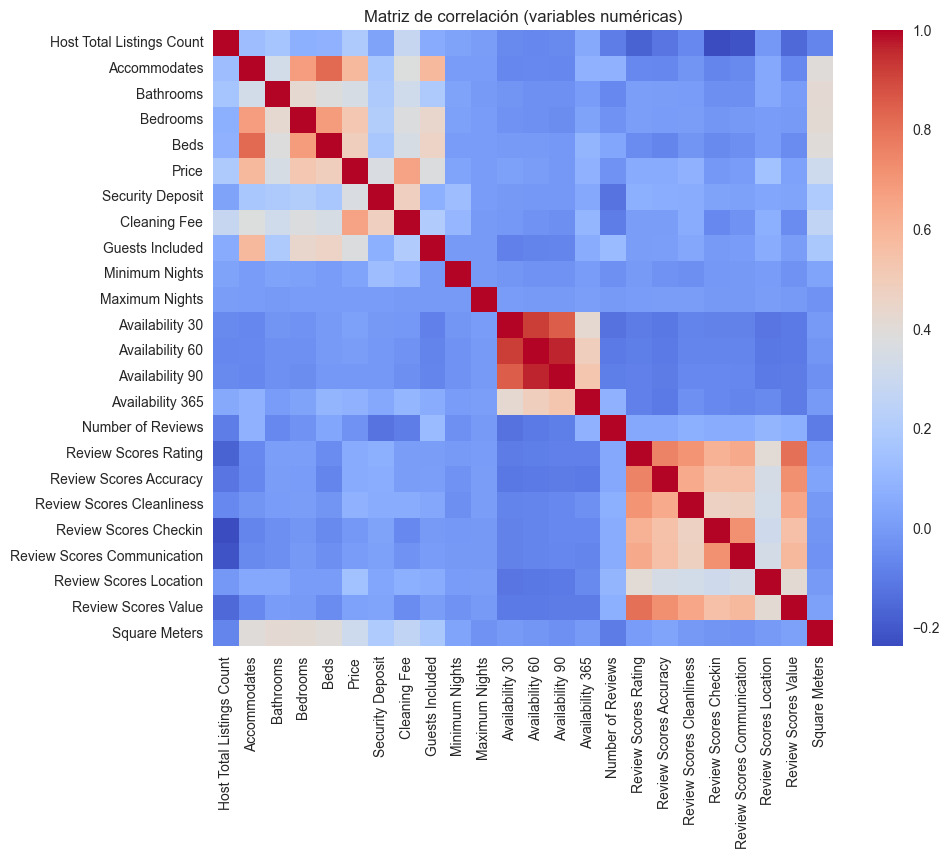

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seleccionamos solo variables numéricas originales
num_cols = madrid_data.select_dtypes(include=['int64', 'float64']).columns

corr_matrix = madrid_data[num_cols].corr()

corr_matrix['Price'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

Variables más relacionadas con el precio (Price)

Se aprecia una correlación positiva moderada entre el precio y variables relacionadas con el tamaño y la capacidad del alojamiento, como:

- Accommodates

- Bedrooms

- Beds

- Bathrooms

- Square Meters

Esto indica que, en general, a mayor tamaño o capacidad, mayor precio, algo lógico desde el punto de vista del dominio.

- Variables de disponibilidad

Las variables de disponibilidad (Availability 30, 60, 90 y 365) presentan una alta correlación entre sí, pero una relación débil con el precio.
Esto sugiere que están midiendo un comportamiento similar y que no influyen directamente en el precio del alojamiento.

- Variables de puntuaciones y valoraciones

Las variables relacionadas con las valoraciones (Review Scores) muestran una fuerte correlación entre ellas. Sin embargo, su relación con el precio es débil, por lo que una mejor valoración no implica necesariamente un alojamiento más caro.

- Otras variables

Variables como:

- Host Total Listings Count
- Number of Reviews
- Minimum Nights y Maximum Nights

presentan correlaciones bajas con el precio, lo que indica que, de forma aislada, no son determinantes claros del coste del alojamiento.
Aunque algunas variables presentan una baja correlación lineal con la variable objetivo, no se han eliminado en esta fase, ya que la matriz de correlación se ha utilizado únicamente con fines exploratorios. 

In [13]:

#Eliminamos columnas ya innecesarias
madrid_data = madrid_data.drop(['City', 'State'], axis=1)

madrid_data.info()

# =============================================
# TRAIN / TEST SPLIT
# =============================================

from sklearn.model_selection import train_test_split

X = madrid_data.drop('Price', axis=1)
y = madrid_data['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3
) 
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

from sklearn.impute import SimpleImputer
import pandas as pd
# =============================================
# IMPUTACIÓN DE VALORES NULOS
# =============================================

# ---------- NUMÉRICAS ----------
num_mean_cols = ['Bathrooms', 'Beds']

imp_mean = SimpleImputer(strategy='mean')
X_train[num_mean_cols] = imp_mean.fit_transform(X_train[num_mean_cols])
X_test[num_mean_cols] = imp_mean.transform(X_test[num_mean_cols])

# ---------- CATEGÓRICAS ----------
cat_cols = [
    'Neighbourhood Cleansed',
    'Neighbourhood Group Cleansed',
    'Market',
    'Property Type',
    'Room Type',
    'Bed Type',
    'Cancellation Policy'
]

imp_cat = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = imp_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imp_cat.transform(X_test[cat_cols])

# ---------- CONSTANTE 0 ----------
zero_cols = [
    'Host Total Listings Count',
    'Security Deposit',
    'Cleaning Fee',
    'Review Scores Rating',
    'Bedrooms'
]

imp_zero = SimpleImputer(strategy='constant', fill_value=0)
X_train[zero_cols] = imp_zero.fit_transform(X_train[zero_cols])
X_test[zero_cols] = imp_zero.transform(X_test[zero_cols])

# ---------- ZIPCODE ----------
for df_ in [X_train, X_test]:
    df_['Zipcode'] = df_['Zipcode'].astype(str).str.strip()
    df_['Zipcode'] = pd.to_numeric(df_['Zipcode'], errors='coerce')


# =============================================
# CODIFICACIÓN CATEGÓRICA (ONE-HOT)
# =============================================

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
cat_cols = [
    col for col in [
        'Neighbourhood Cleansed',
        'Neighbourhood Group Cleansed',
        'Market',
        'Property Type',
        'Room Type',
        'Bed Type',
        'Cancellation Policy'
    ]
    if col in X_train.columns
]

print("Columnas categóricas usadas:", cat_cols)

# Creamos el encoder
ohe = OneHotEncoder(
    handle_unknown='ignore',   # categorías no vistas → columnas a 0
    sparse_output=False        # para trabajar cómodamente con DataFrames
)

# Ajustamos SOLO con train
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# Convertimos a DataFrame para mantener legibilidad
ohe_cols = ohe.get_feature_names_out(cat_cols)

X_train_cat = pd.DataFrame(
    X_train_cat,
    columns=ohe_cols,
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    X_test_cat,
    columns=ohe_cols,
    index=X_test.index
)

# Eliminamos las columnas categóricas originales
X_train = X_train.drop(columns=cat_cols)
X_test = X_test.drop(columns=cat_cols)

# Unimos variables numéricas + categóricas codificadas
X_train = pd.concat([X_train, X_train_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)

print("Codificación One-Hot completada correctamente.")

# =============================================
# IMPUTACIÓN DE VALORES NULOS
# =============================================

from sklearn.impute import SimpleImputer

# Columnas numéricas a imputar con media
num_mean_cols = ['Bathrooms', 'Beds']

imp_mean = SimpleImputer(strategy='mean')
X_train[num_mean_cols] = imp_mean.fit_transform(X_train[num_mean_cols])
X_test[num_mean_cols] = imp_mean.transform(X_test[num_mean_cols])


# Columnas a imputar con 0
zero_cols = [
    'Host Total Listings Count',
    'Security Deposit',
    'Cleaning Fee',
    'Review Scores Rating',
    'Bedrooms'
]

imp_zero = SimpleImputer(strategy='constant', fill_value=0)
X_train[zero_cols] = imp_zero.fit_transform(X_train[zero_cols])
X_test[zero_cols] = imp_zero.transform(X_test[zero_cols])

# Zipcode a numérico
for df_ in [X_train, X_test]:
    df_['Zipcode'] = df_['Zipcode'].astype(str).str.strip()
    df_['Zipcode'] = pd.to_numeric(df_['Zipcode'], errors='coerce')

print("Imputación de valores nulos completada correctamente.")
##Limpieza de datos
#Eliminamos las columnas que no aportan información relevante para el análisis
cols_to_drop = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary', 'Space', 'Description',
    'Experiences Offered', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
    'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID',
    'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Response Time',
    'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
    'Host Neighbourhood', 'Host Listings Count', 'Street', 'Smart Location', 'Country Code',
    'Calendar Updated', 'Has Availability', 'Calendar last Scraped', 'First Review', 'Last Review',
    'License', 'Jurisdiction Names', 'Calculated host listings count', 'Reviews per Month', 'Features',
    'Geolocation', 'Latitude', 'Longitude', 'Country', 'Host Verifications', 'Amenities', 'Weekly Price',
    'Monthly Price', 'Extra People', 'Neighbourhood', 'zipcode'
]

house_data_clean = house_data.drop(columns=[col for col in cols_to_drop if col in house_data.columns]) 



# Conversión de Square Feet a Square Meters
house_data_clean['Square Meters'] = house_data_clean['Square Feet'] * 0.092903
house_data_clean = house_data_clean.drop('Square Feet', axis=1)

# Nos quedamos solo con los anuncios de Madrid
madrid_data = house_data_clean[house_data_clean['City'] == 'Madrid'].copy()

print("Número de anuncios en Madrid:", madrid_data.shape[0])
print(f"Porcentaje de anuncios en Madrid: {madrid_data.shape[0] / house_data.shape[0] * 100:.2f}%")

# Eliminamos columnas ya innecesarias
madrid_data = madrid_data.drop(['City', 'State'], axis=1)

madrid_data.info()

# =============================================
# TRAIN / TEST SPLIT
# =============================================

from sklearn.model_selection import train_test_split

X = madrid_data.drop('Price', axis=1)
y = madrid_data['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3
) 
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])

from sklearn.impute import SimpleImputer
import pandas as pd
# =============================================
# IMPUTACIÓN DE VALORES NULOS
# =============================================

# ---------- NUMÉRICAS ----------
num_mean_cols = ['Bathrooms', 'Beds']

imp_mean = SimpleImputer(strategy='mean')
X_train[num_mean_cols] = imp_mean.fit_transform(X_train[num_mean_cols])
X_test[num_mean_cols] = imp_mean.transform(X_test[num_mean_cols])

# ---------- CATEGÓRICAS ----------
cat_cols = [
    'Neighbourhood Cleansed',
    'Neighbourhood Group Cleansed',
    'Market',
    'Property Type',
    'Room Type',
    'Bed Type',
    'Cancellation Policy'
]

imp_cat = SimpleImputer(strategy='most_frequent')
X_train[cat_cols] = imp_cat.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imp_cat.transform(X_test[cat_cols])

# ---------- CONSTANTE 0 ----------
zero_cols = [
    'Host Total Listings Count',
    'Security Deposit',
    'Cleaning Fee',
    'Review Scores Rating',
    'Bedrooms'
]

imp_zero = SimpleImputer(strategy='constant', fill_value=0)
X_train[zero_cols] = imp_zero.fit_transform(X_train[zero_cols])
X_test[zero_cols] = imp_zero.transform(X_test[zero_cols])

# ---------- ZIPCODE ----------
for df_ in [X_train, X_test]:
    df_['Zipcode'] = df_['Zipcode'].astype(str).str.strip()
    df_['Zipcode'] = pd.to_numeric(df_['Zipcode'], errors='coerce')


# =============================================
# CODIFICACIÓN CATEGÓRICA (ONE-HOT)
# =============================================

from sklearn.preprocessing import OneHotEncoder
import pandas as pd
cat_cols = [
    col for col in [
        'Neighbourhood Cleansed',
        'Neighbourhood Group Cleansed',
        'Market',
        'Property Type',
        'Room Type',
        'Bed Type',
        'Cancellation Policy'
    ]
    if col in X_train.columns
]

print("Columnas categóricas usadas:", cat_cols)

# Creamos el encoder
ohe = OneHotEncoder(
    handle_unknown='ignore',   # categorías no vistas → columnas a 0
    sparse_output=False        # para trabajar cómodamente con DataFrames
)

# Ajustamos SOLO con train
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

# Convertimos a DataFrame para mantener legibilidad
ohe_cols = ohe.get_feature_names_out(cat_cols)

X_train_cat = pd.DataFrame(
    X_train_cat,
    columns=ohe_cols,
    index=X_train.index
)

X_test_cat = pd.DataFrame(
    X_test_cat,
    columns=ohe_cols,
    index=X_test.index
)

# Eliminamos las columnas categóricas originales
X_train = X_train.drop(columns=cat_cols)
X_test = X_test.drop(columns=cat_cols)

# Unimos variables numéricas + categóricas codificadas
X_train = pd.concat([X_train, X_train_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)

print("Codificación One-Hot completada correctamente.")

# =============================================
# IMPUTACIÓN DE VALORES NULOS
# =============================================

from sklearn.impute import SimpleImputer

# Columnas numéricas a imputar con media
num_mean_cols = ['Bathrooms', 'Beds']

imp_mean = SimpleImputer(strategy='mean')
X_train[num_mean_cols] = imp_mean.fit_transform(X_train[num_mean_cols])
X_test[num_mean_cols] = imp_mean.transform(X_test[num_mean_cols])
imp_final = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(
    imp_final.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test = pd.DataFrame(
    imp_final.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

# Columnas a imputar con 0
zero_cols = [
    'Host Total Listings Count',
    'Security Deposit',
    'Cleaning Fee',
    'Review Scores Rating',
    'Bedrooms'
]

imp_zero = SimpleImputer(strategy='constant', fill_value=0)
X_train[zero_cols] = imp_zero.fit_transform(X_train[zero_cols])
X_test[zero_cols] = imp_zero.transform(X_test[zero_cols])

# Zipcode a numérico
for df_ in [X_train, X_test]:
    df_['Zipcode'] = df_['Zipcode'].astype(str).str.strip()
    df_['Zipcode'] = pd.to_numeric(df_['Zipcode'], errors='coerce')

print("Imputación de valores nulos completada correctamente.")
# =============================================
# ESCALADO DE VARIABLES
# =============================================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)    
print("Escalado de variables completado correctamente.")

# =============================================
# ESCALADO DE VARIABLES
# =============================================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)    
print("Escalado de variables completado correctamente.")


<class 'pandas.core.frame.DataFrame'>
Index: 13198 entries, 40 to 14757
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Host Total Listings Count     13195 non-null  float64
 1   Neighbourhood Cleansed        13198 non-null  object 
 2   Neighbourhood Group Cleansed  13198 non-null  object 
 3   Zipcode                       12759 non-null  object 
 4   Market                        13148 non-null  object 
 5   Property Type                 13198 non-null  object 
 6   Room Type                     13198 non-null  object 
 7   Accommodates                  13198 non-null  int64  
 8   Bathrooms                     13150 non-null  float64
 9   Bedrooms                      13175 non-null  float64
 10  Beds                          13150 non-null  float64
 11  Bed Type                      13198 non-null  object 
 12  Price                         13198 non-null  float64
 13  Secur

# 5. Primer entrenamiento de un modelo ML: Lasso 

In [14]:
#Como lasso nos da valores nulos en y_train, pese a haberlos limpiado antes, volvemos a comprobar si hay NaN en y_train
print("NaN en y_train:", y_train.isna().sum())

# Aseguramos alineación total
train_df = X_train.copy()
train_df['Price'] = y_train

# Eliminamos cualquier fila problemática restante
train_df = train_df.dropna(subset=['Price'])

# Volvemos a separar
X_train = train_df.drop('Price', axis=1)
y_train = train_df['Price']
print("NaN en y_train después de esta transformación:", y_train.isna().sum())


NaN en y_train: 8
NaN en y_train después de esta transformación: 0


In [15]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Entrenamiento del modelo Lasso
lasso = Lasso(alpha=0.01, random_state=3, max_iter=10000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

#Antes de la evaluación del modelo se realizó una comprobación final para asegurar que tanto los valores reales como las predicciones no contenían valores nulos, eliminando los registros 
#restantes con información incompleta para poder calcular correctamente las métricas de evaluación.
eval_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred_lasso
})

eval_df = eval_df.dropna()

mae = mean_absolute_error(eval_df['y_test'], eval_df['y_pred'])
mse = mean_squared_error(eval_df['y_test'], eval_df['y_pred'])
r2 = r2_score(eval_df['y_test'], eval_df['y_pred'])
print (f"Lasso Regression - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.4f}")

Lasso Regression - MAE: 21.10, MSE: 1499.28, R2: 0.5744


In [16]:
# extraemos los predictores seleccionados por Lasso
selected_features = X_train.columns[lasso.coef_ != 0]
print("Número de características seleccionadas por Lasso:", len(selected_features))
X_train_lasso = X_train[selected_features]
X_test_lasso = X_test[selected_features]
# e --- IGNORE ---

print (f"Lasso Regression - MAE: {mae:.2f}, MSE: {mse:.2f}, R2: {r2:.4f}")

Número de características seleccionadas por Lasso: 178
Lasso Regression - MAE: 21.10, MSE: 1499.28, R2: 0.5744


Mejor alpha para Lasso: {'alpha': 1}
Mejor MSE (CV): 1473.8695480776883

--- Evaluación del Modelo Lasso ---
MSE Modelo Lasso (train): 1403.23
MSE Modelo Lasso (test) : 1520.76
RMSE Modelo Lasso (train): 37.460
RMSE Modelo Lasso (test) : 38.997


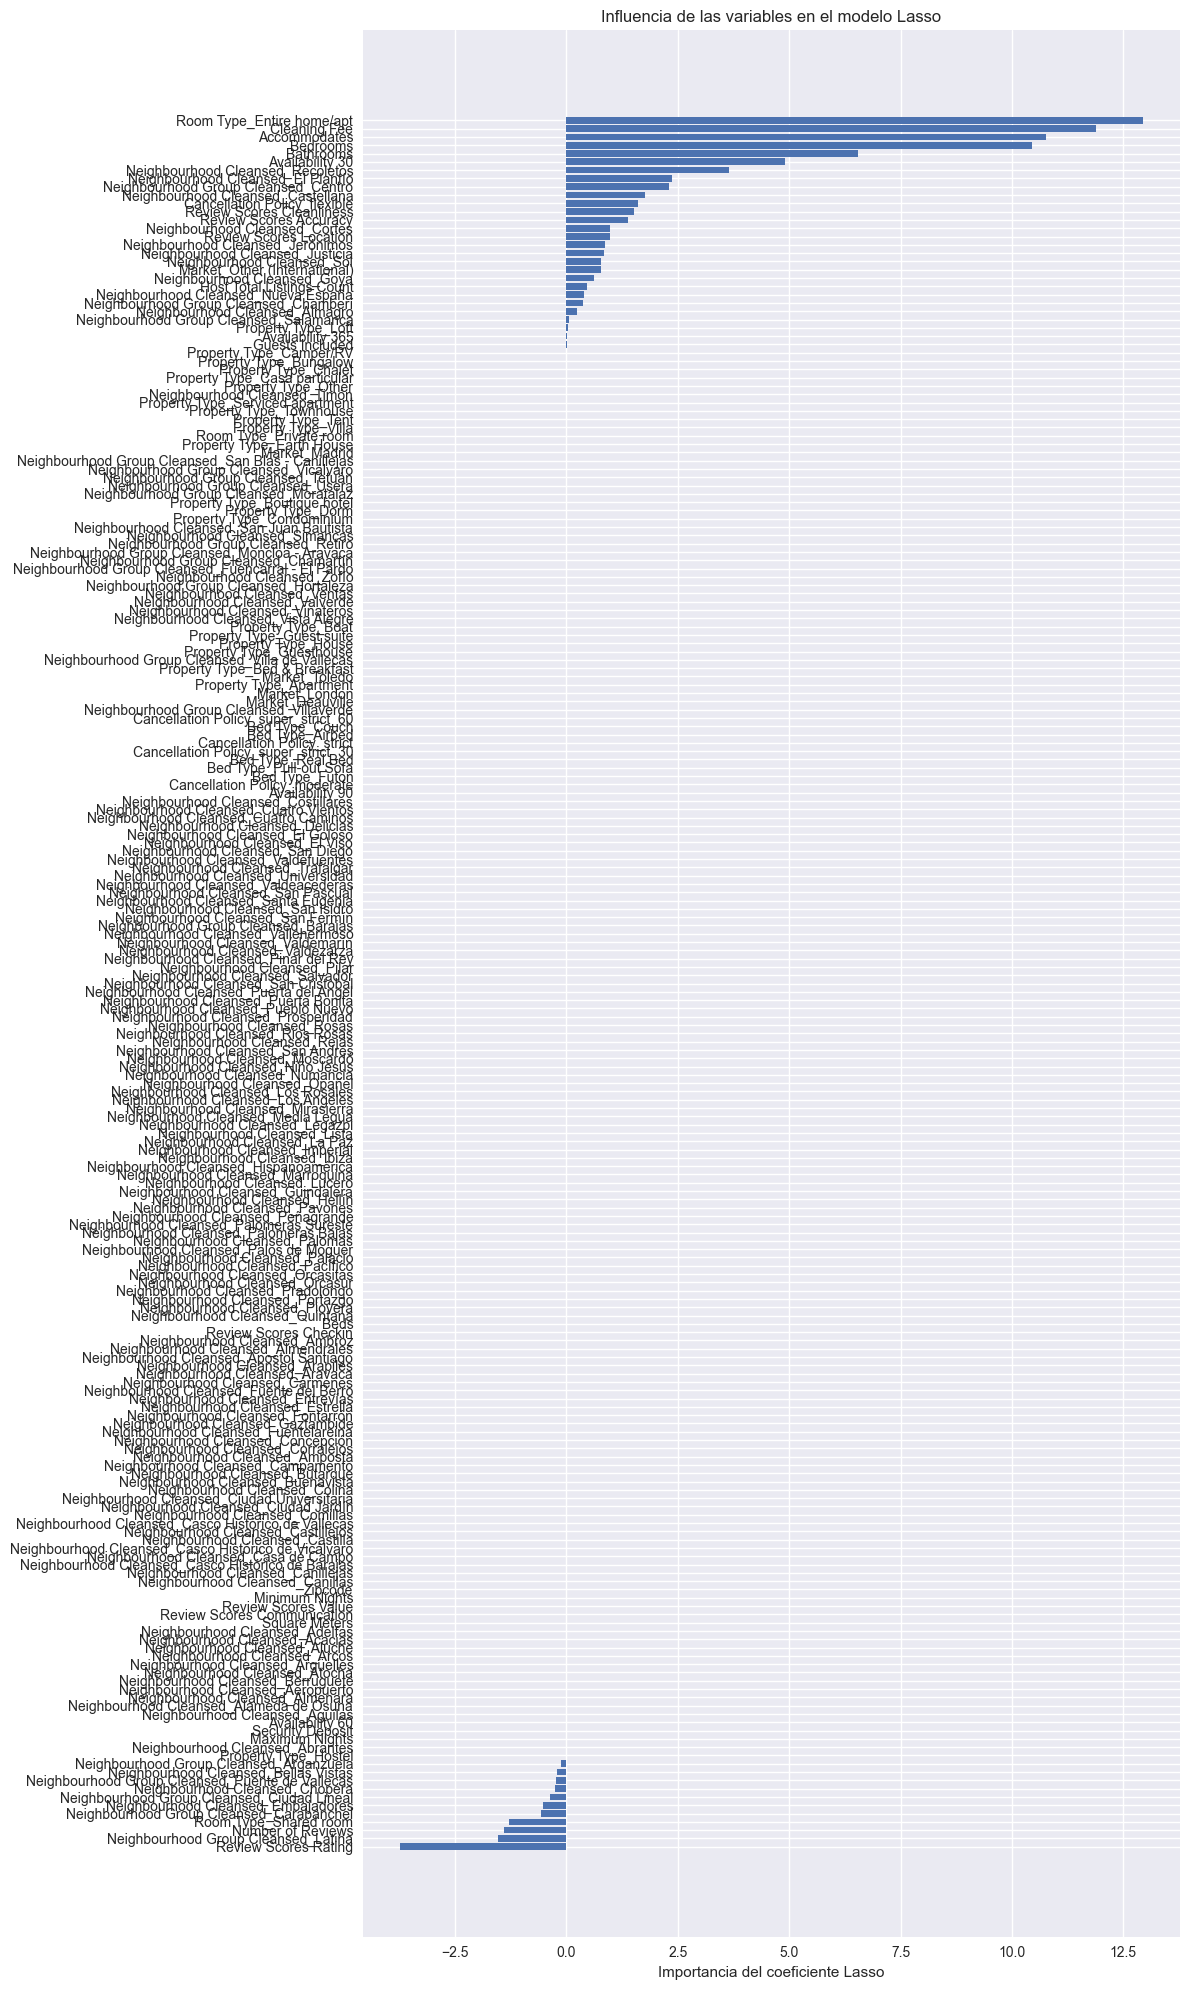

In [27]:
# =============================================
# GRIDSEARCH PARA LASSO
# =============================================

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

lasso = Lasso(random_state=3, max_iter=10000)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}

grid_lasso = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenamiento SOLO con train
grid_lasso.fit(X_train, y_train)

# Mejor modelo Lasso
best_lasso = grid_lasso.best_estimator_

print("Mejor alpha para Lasso:", grid_lasso.best_params_)
print("Mejor MSE (CV):", -grid_lasso.best_score_)

# =============================================
# EVALUACIÓN DEL MODELO LASSO OPTIMIZADO
# =============================================

# Predicciones
y_train_hat = best_lasso.predict(X_train)
y_test_hat = best_lasso.predict(X_test)

# DataFrame para evaluación limpia
eval_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_test_hat
})

eval_df = eval_df.replace([np.inf, -np.inf], np.nan)
eval_df = eval_df.dropna()

# Métricas
mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(eval_df['y_test'], eval_df['y_pred'])

print("\n--- Evaluación del Modelo Lasso ---")
print(f"MSE Modelo Lasso (train): {mse_train:.2f}")
print(f"MSE Modelo Lasso (test) : {mse_test:.2f}")
print(f"RMSE Modelo Lasso (train): {np.sqrt(mse_train):.3f}")
print(f"RMSE Modelo Lasso (test) : {np.sqrt(mse_test):.3f}")


#análisis de importancia de variables
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
importances = best_lasso.coef_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, min(20, len(feature_names) * 0.35)))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Importancia del coeficiente Lasso")
plt.title("Influencia de las variables en el modelo Lasso")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5.1.  Gráficas:
En este apartado, vamos a crear gráficas que nos van a ayudar a entender mejor los resultados obtenidos por nuestro modelo Lasso. 
Para esto, crearemos una gráfica donde se muestre la diferencia entre el precio real y el predicho, y una gráfica que nos muestre la acumulación de errores (superiores o inferiores) al precio predicho

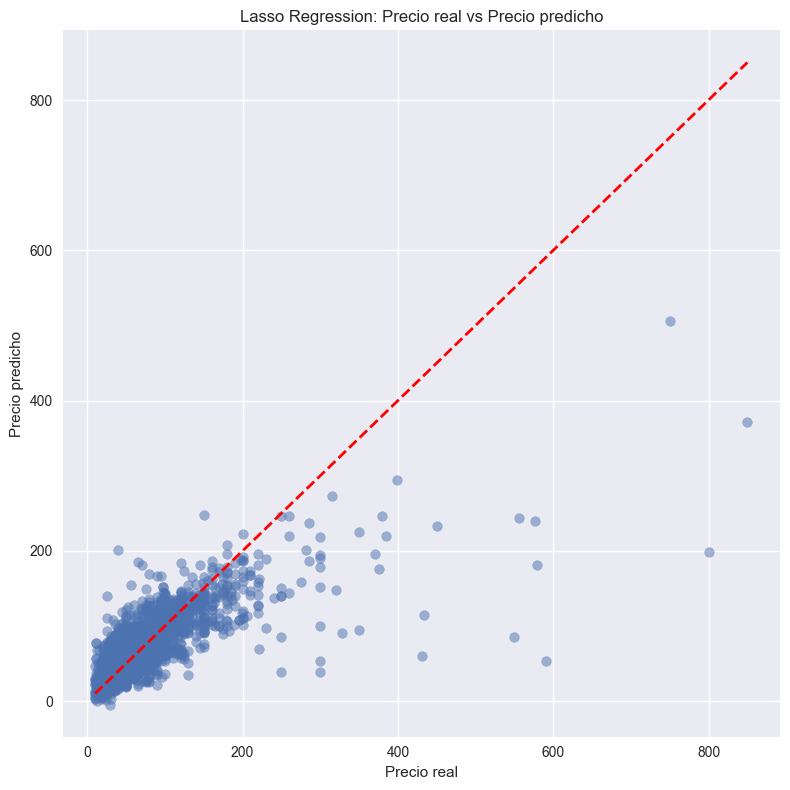

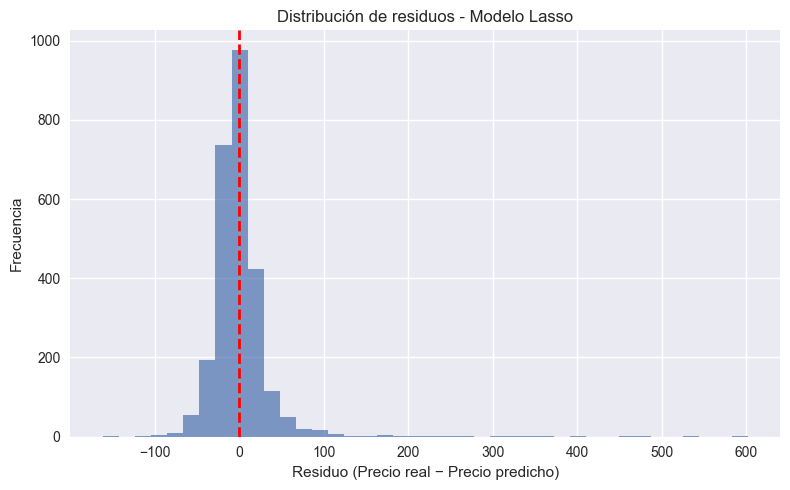

In [18]:
#Comparativa valor real vs valor predicho
import matplotlib.pyplot as plt
import numpy as np

# Predicciones con Lasso
y_pred_lasso = best_lasso.predict(X_test)

# Gráfica valor real vs valor predicho
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2
)

plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Lasso Regression: Precio real vs Precio predicho")
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfica distribución de errores
import matplotlib.pyplot as plt
import numpy as np

# Predicciones
y_pred_lasso = best_lasso.predict(X_test)

# Cálculo de residuos
residuos = y_test - y_pred_lasso

# Histograma de residuos
plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=40, alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Residuo (Precio real − Precio predicho)")
plt.ylabel("Frecuencia")
plt.title("Distribución de residuos - Modelo Lasso")
plt.grid(True)
plt.tight_layout()
plt.show()



## 5.2 Conclusiones del modelo Lasso

En este primer modelo, la selección de variables realizada por Lasso descarta muchos coeficientes, reduciéndolos a cero, lo que permite simplificar el modelo y mejorar su interpretabilidad. En este caso, las variables más importantes corresponden principalmente a características estructurales del alojamiento, como el tipo de habitación (*room type*), la capacidad (*accommodates*), el número de dormitorios, baños y camas.

Las variables relacionadas con el barrio, que han sido transformadas en variables *dummy*, presentan un peso mucho menor. Esto se debe a que, al realizar la codificación *one-hot*, la influencia de cada barrio se reparte entre múltiples categorías, reduciendo el impacto individual de cada una de ellas. De forma similar, las variables relacionadas con las reseñas muestran una influencia más limitada en comparación con las variables estructurales.

### Evaluación del Modelo Lasso

- MSE (train): 1403.23  
- MSE (test): 1520.76  
- RMSE (train): 37.46  
- RMSE (test): 38.99  

A partir de los resultados obtenidos, el modelo Lasso presenta un error medio de predicción en torno a los 37–39 euros. Esto indica que, de media, las predicciones del precio se desvían aproximadamente esa cantidad respecto al valor real. El valor del RMSE sugiere que existen algunos alojamientos con errores de predicción mayores, especialmente aquellos con precios más elevados o características menos habituales.

En la gráfica de precio real frente a precio predicho se observa que el modelo obtiene mejores resultados en alojamientos de precio bajo, mientras que los errores aumentan a medida que el precio del alojamiento es mayor.

Por último, la distribución de los residuos muestra una ligera tendencia a errores por debajo del precio real, aunque esta diferencia no resulta especialmente significativa.


# 6. Modelo Ridge
dado que hemos conseguido realizar un buen modelo con Lasso, vamos a tratar de usar los mismos datos para hacer un modelo usando Ridge
Ridge busca usar todas las variables que haya disponibles, siempre que los coeficientes resultantes no sean demasiado grandes, penalizando aquellos que sean demasiado grandes. 

In [24]:
# =============================================
# MODELO RIDGE (usando train/test ya creados)
# =============================================

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Entrenamiento del modelo Ridge
ridge = Ridge(alpha=1.0, random_state=3)
ridge.fit(X_train, y_train)

# =============================================
# PREDICCIONES
# =============================================
y_train_hat = ridge.predict(X_train)
y_test_hat = ridge.predict(X_test)

# =============================================
# EVALUACIÓN DEL MODELO RIDGE (limpieza final)
# =============================================

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# DataFrame conjunto para evaluación
eval_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_test_hat
})

# Eliminamos NaN e infinitos
eval_df = eval_df.replace([np.inf, -np.inf], np.nan)
eval_df = eval_df.dropna()

# Métricas
mse_test = mean_squared_error(eval_df['y_test'], eval_df['y_pred'])
rmse_test = np.sqrt(mse_test)

mse_train = mean_squared_error(y_train, y_train_hat)
rmse_train = np.sqrt(mse_train)

print("--- Evaluación del Modelo Ridge ---")
print(f"MSE Modelo Ridge (train): {mse_train:.2f}")
print(f"MSE Modelo Ridge (test) : {mse_test:.2f}")
print(f"RMSE Modelo Ridge (train): {rmse_train:.3f}")
print(f"RMSE Modelo Ridge (test) : {rmse_test:.3f}")




--- Evaluación del Modelo Ridge ---
MSE Modelo Ridge (train): 1346.58
MSE Modelo Ridge (test) : 1500.11
RMSE Modelo Ridge (train): 36.696
RMSE Modelo Ridge (test) : 38.731


Mejor alpha para Ridge: {'alpha': 100}
Mejor MSE (CV): 1487.040686700537

--- Evaluación del Modelo Ridge Optimizado ---
MSE Modelo Ridge (train): 1346.72
MSE Modelo Ridge (test) : 1501.02
RMSE Modelo Ridge (train): 36.698
RMSE Modelo Ridge (test) : 38.743


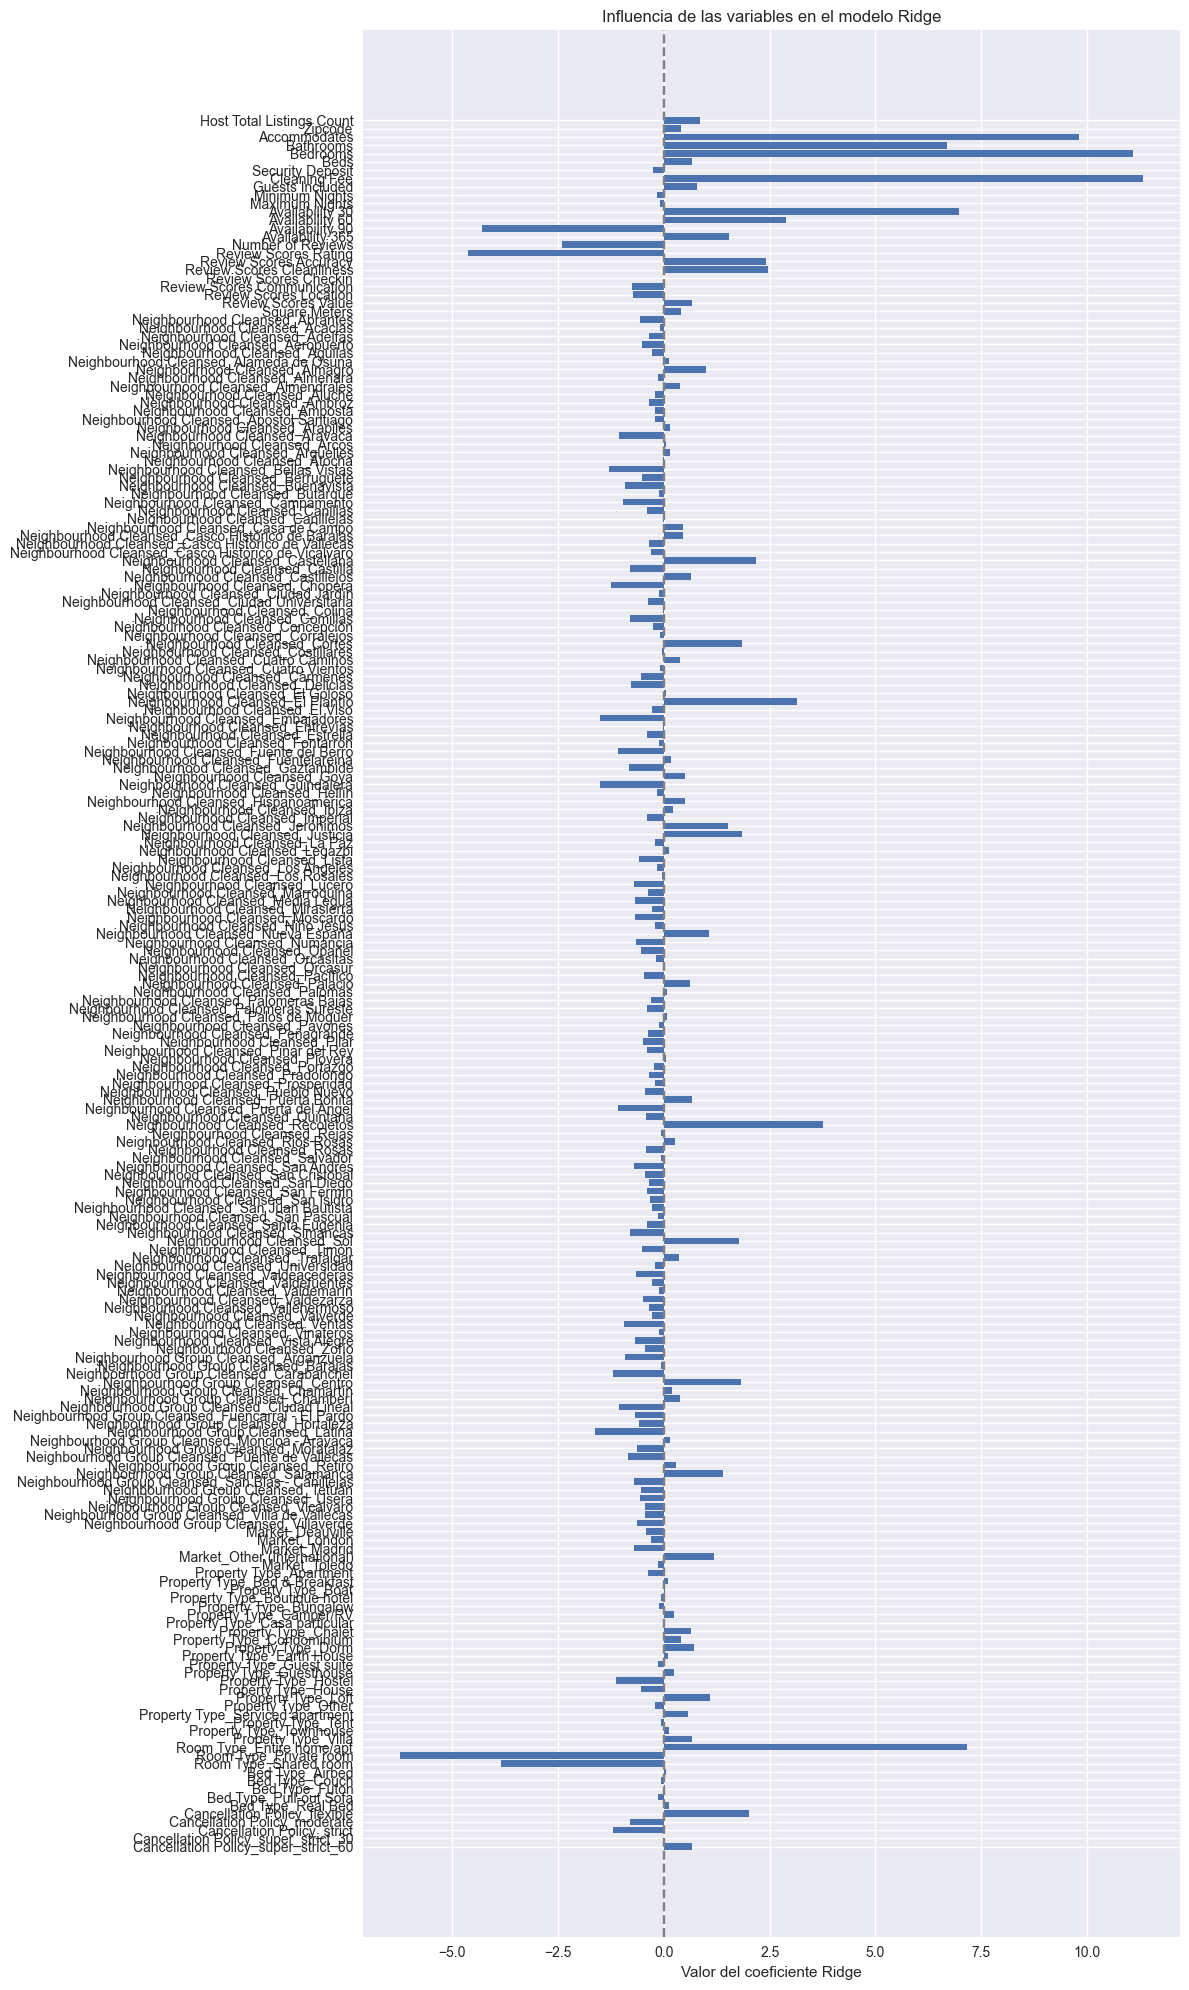

In [25]:
# =============================================
# GRIDSEARCH PARA RIDGE
# =============================================

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Modelo base
ridge = Ridge(random_state=3)

# barrido de hiperparámetros
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]
}

# Configuración del GridSearch
grid_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Entrenamiento SOLO con train
grid_ridge.fit(X_train, y_train)

# Mejor modelo Ridge
best_ridge = grid_ridge.best_estimator_

print("Mejor alpha para Ridge:", grid_ridge.best_params_)
print("Mejor MSE (CV):", -grid_ridge.best_score_)

# =============================================
# EVALUACIÓN DEL MODELO RIDGE OPTIMIZADO
# =============================================

# Predicciones
y_train_hat = best_ridge.predict(X_train)
y_test_hat = best_ridge.predict(X_test)

# DataFrame para evaluación limpia
eval_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_test_hat
})

eval_df = eval_df.replace([np.inf, -np.inf], np.nan)
eval_df = eval_df.dropna()

# Métricas
mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(eval_df['y_test'], eval_df['y_pred'])

print("\n--- Evaluación del Modelo Ridge Optimizado ---")
print(f"MSE Modelo Ridge (train): {mse_train:.2f}")
print(f"MSE Modelo Ridge (test) : {mse_test:.2f}")
print(f"RMSE Modelo Ridge (train): {np.sqrt(mse_train):.3f}")
print(f"RMSE Modelo Ridge (test) : {np.sqrt(mse_test):.3f}")
# =============================================
# DATAFRAME DE COEFICIENTES RIDGE
# =============================================
coef_ridge_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coeficiente': best_ridge.coef_
})


# =============================================
# GRÁFICO DE COEFICIENTES
# =============================================

plt.figure(figsize=(12, min(20, len(coef_ridge_df) * 0.35)))
plt.barh(coef_ridge_df['Feature'], coef_ridge_df['Coeficiente'])
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Valor del coeficiente Ridge')
plt.title('Influencia de las variables en el modelo Ridge')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 6.1 Gráficas
Una vez más crearemos las mismas gráficas para observar mejor los resultados de nuestro modelo 

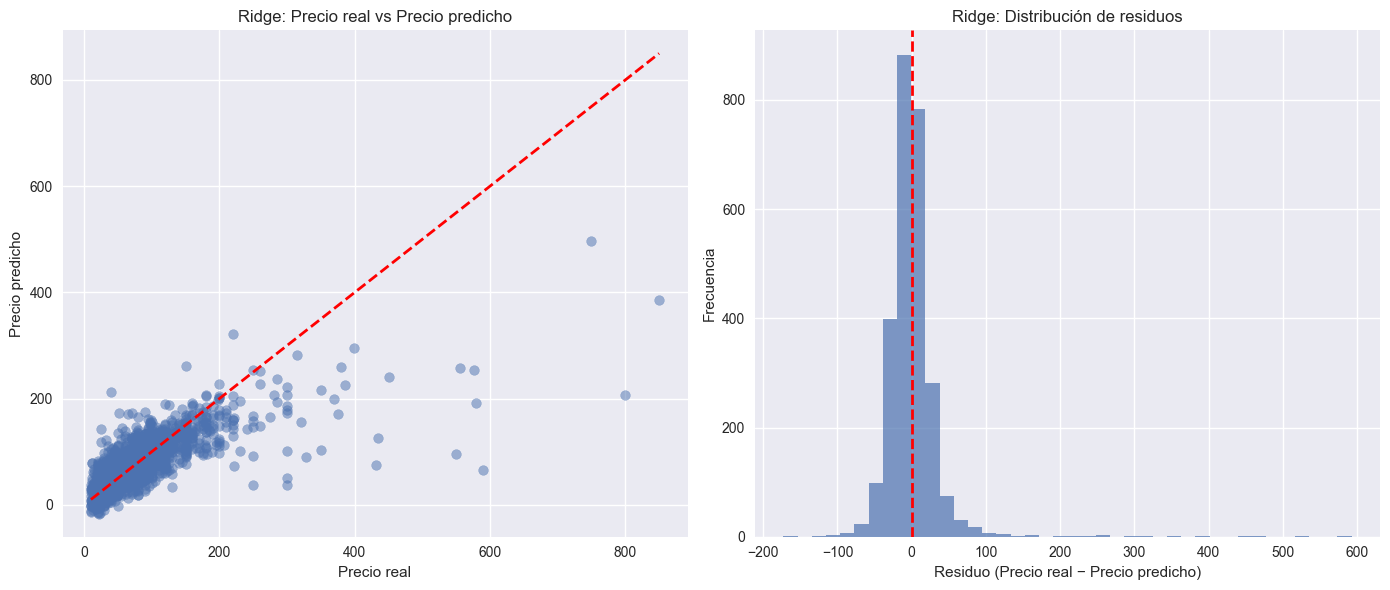

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Predicciones con Ridge
y_pred_ridge = best_ridge.predict(X_test)

# Cálculo de residuos
residuos_ridge = y_test - y_pred_ridge

# Crear figura con dos subgráficas
plt.figure(figsize=(14, 6))

# ----------------------------------
# 1️⃣ Precio real vs precio predicho
# ----------------------------------
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2
)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Ridge: Precio real vs Precio predicho")
plt.grid(True)

# ----------------------------------
# 2️⃣ Distribución de residuos
# ----------------------------------
plt.subplot(1, 2, 2)
plt.hist(residuos_ridge, bins=40, alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuo (Precio real − Precio predicho)")
plt.ylabel("Frecuencia")
plt.title("Ridge: Distribución de residuos")
plt.grid(True)

plt.tight_layout()
plt.show()


## 6.2 Conclusiones del modelo Ridge

En este caso, el mejor valor del parámetro alpha para el modelo Ridge es 100. Observamos que el modelo Ridge presenta un error similar al obtenido con Lasso utilizando las mismas variables, siendo sus métricas las siguientes:

### Evaluación del Modelo Ridge Optimizado

- MSE (train): 1346.72  
- MSE (test): 1501.02  
- RMSE (train): 36.70  
- RMSE (test): 38.74  

Esto implica que no se observan problemas de overfitting, dado que la diferencia entre los errores de entrenamiento y test es reducida (en torno a 2 euros).

En el análisis de importancia de variables se observa que el modelo Ridge presenta coeficientes tanto positivos como negativos. La ordenación de los factores coincide en gran medida con la obtenida mediante Random Forest, aunque Ridge asigna algo más de importancia a las variables transformadas en dummies.

Una vez más, las variables con mayor peso en el modelo son aquellas relacionadas con el tamaño y la capacidad del alojamiento, así como el tipo de habitación y otras características estructurales. A continuación, aparecen las variables relacionadas con las reseñas y, por último, las variables categóricas transformadas en dummies, como el barrio al que pertenece cada alojamiento.

Las gráficas muestran que el modelo presenta un mayor porcentaje de aciertos en alojamientos de precio bajo, mientras que los errores aumentan en los rangos de precios más altos. Además, en este caso se observa una mayor cantidad de errores por debajo del precio real que por encima, con una diferencia algo más marcada.


# 7. **Modelo Random Forest**
Vamos a utilizar también  el método Random forest, dado que este puede, por medio de árboles creados aleatoriamente, capturar interacciones complejas y suele ser más preciso.
Este modelo  se basa en los árboles de decisión, y consiste en lo siguiente: 
Random forest crea múltiples árboles de decisión independientes, que entrena con el método bagging. Finalmente combina los resultados de todos los árboles, tomando el promedio de las salidas de todos los árboles.


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Mejor MSE (CV): 1352.7586485393774
Mejor max_depth: {'max_depth': 19}

--- Evaluación del Modelo Random Forest ---
MSE (Train): 1180.50
MSE (Test) : 1554.74
RMSE (Train): 34.358
RMSE (Test) : 39.430


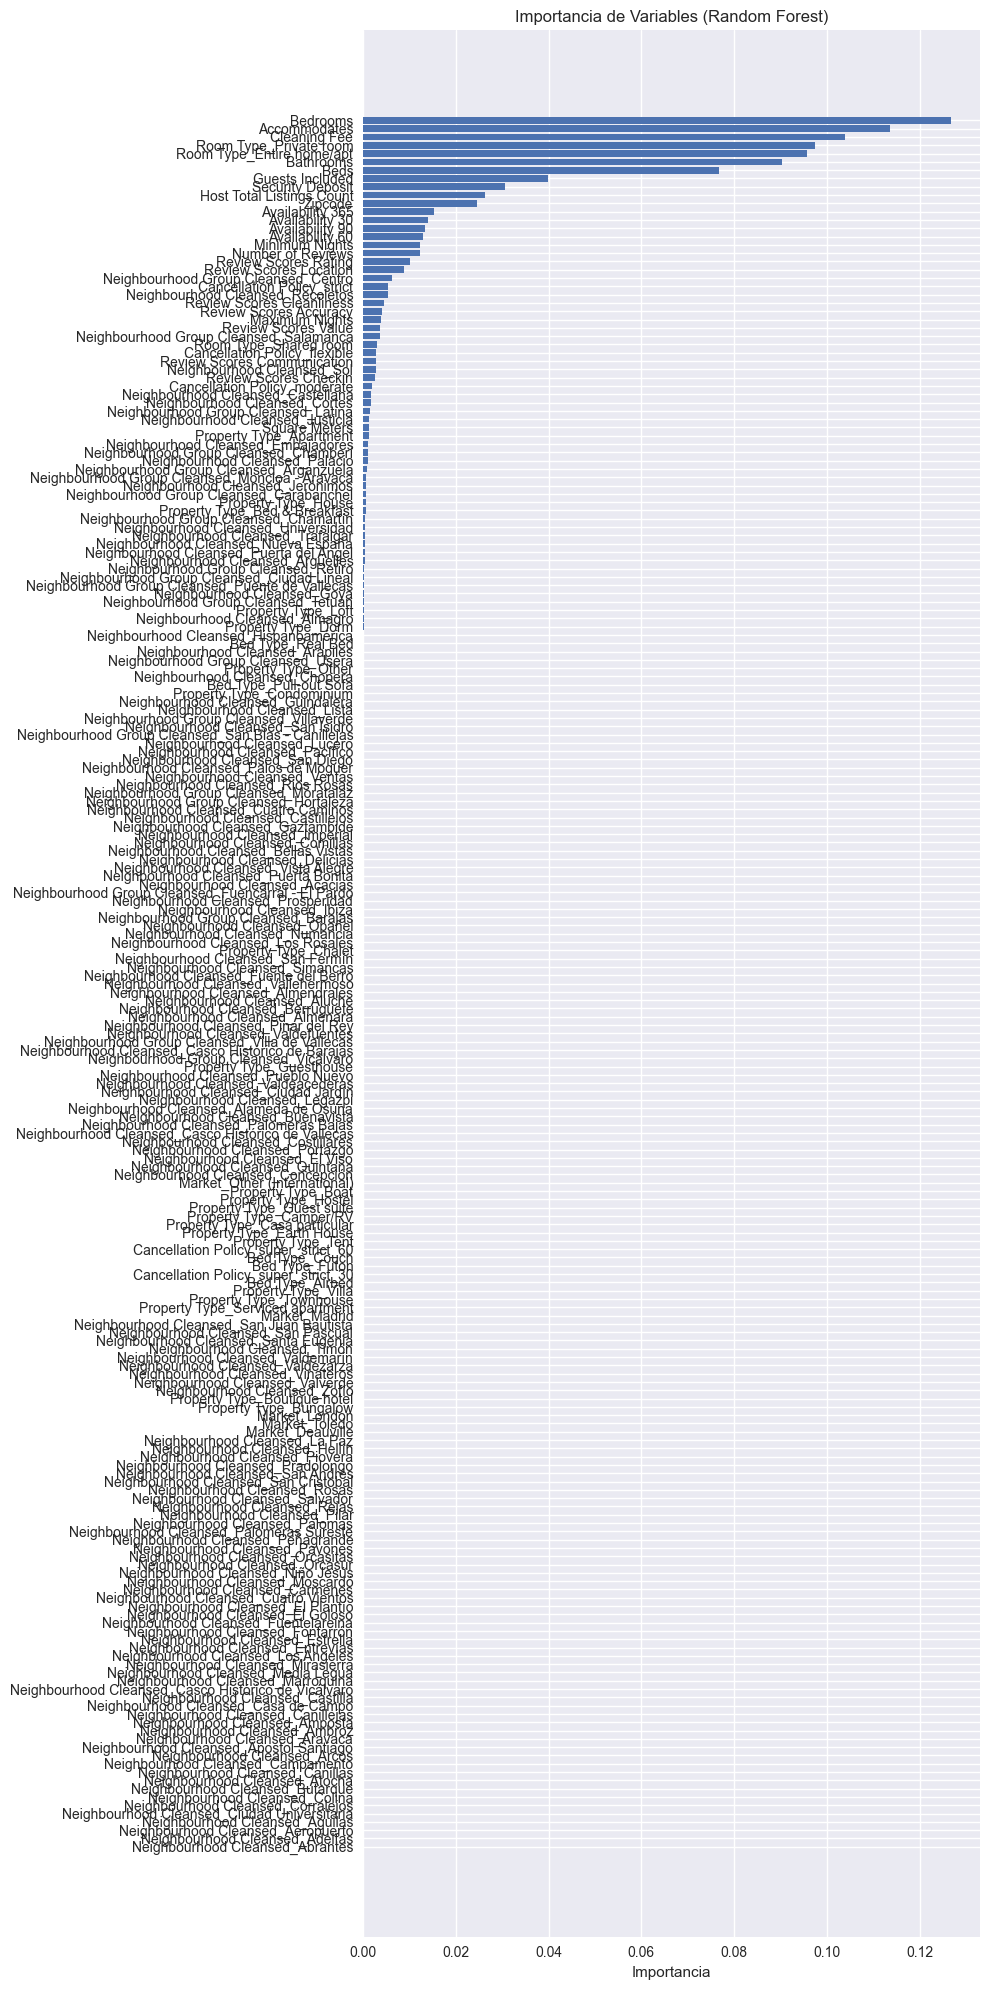

In [23]:
# =============================================
# RANDOM FOREST REGRESSOR
# =============================================

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# =============================================
# GRIDSEARCH PARA MAX_DEPTH
# =============================================

param_grid = {
    'max_depth': range(3, 30)
}

rf_base = RandomForestRegressor(
    n_estimators=500,
    max_features='sqrt',
    min_samples_leaf=10,
    random_state=3,
    n_jobs=-1
)

grid_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)

grid_rf.fit(X_train, y_train)

print("Mejor MSE (CV):", -grid_rf.best_score_)
print("Mejor max_depth:", grid_rf.best_params_)

# =============================================
# MODELO RANDOM FOREST OPTIMIZADO
# =============================================

best_rf = grid_rf.best_estimator_

# Predicciones
y_train_hat = best_rf.predict(X_train)
y_test_hat = best_rf.predict(X_test)

# =============================================
# EVALUACIÓN (limpieza final)
# =============================================

eval_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_test_hat
})

eval_df = eval_df.replace([np.inf, -np.inf], np.nan)
eval_df = eval_df.dropna()

mse_train = mean_squared_error(y_train, y_train_hat)
mse_test = mean_squared_error(eval_df['y_test'], eval_df['y_pred'])

print("\n--- Evaluación del Modelo Random Forest ---")
print(f"MSE (Train): {mse_train:.2f}")
print(f"MSE (Test) : {mse_test:.2f}")
print(f"RMSE (Train): {np.sqrt(mse_train):.3f}")
print(f"RMSE (Test) : {np.sqrt(mse_test):.3f}")

# =============================================
# IMPORTANCIA DE VARIABLES
# =============================================

importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = np.array(X_train.columns)

plt.figure(figsize=(10, min(20, len(feature_names) * 0.35)))
plt.title("Importancia de Variables (Random Forest)")
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# 7.1. Gráficas

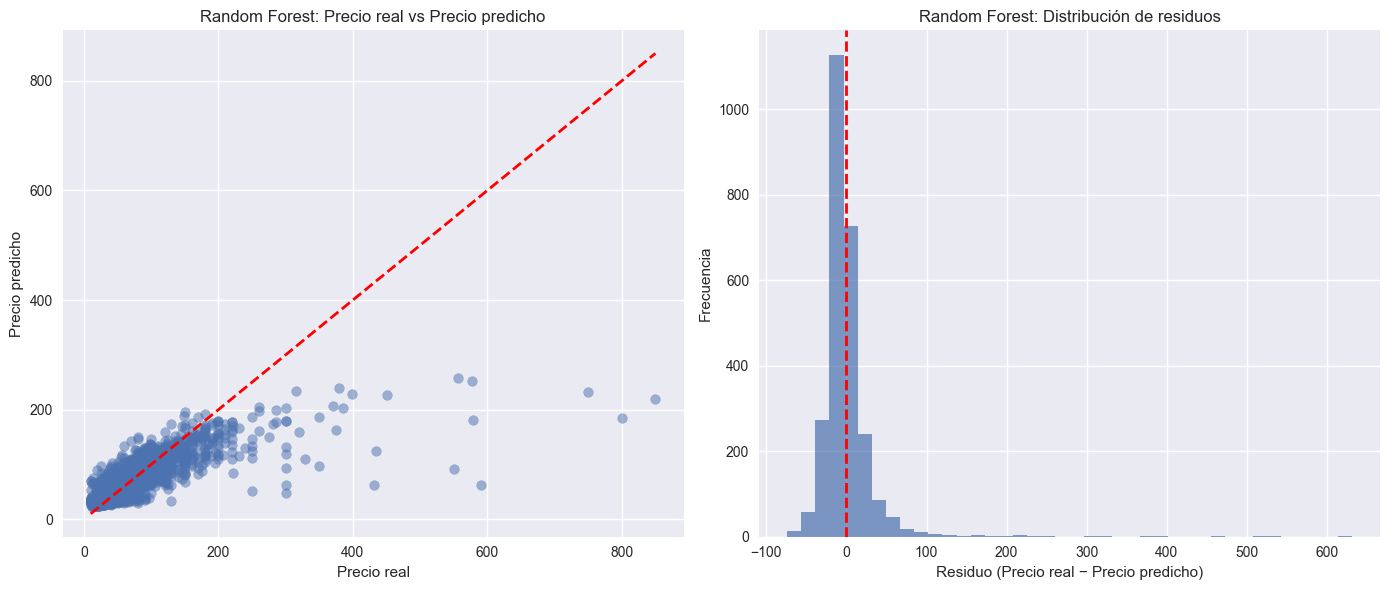

In [ ]:
#gráficas 
import matplotlib.pyplot as plt
import numpy as np

# Predicciones con Random Forest
y_pred_rf = best_rf.predict(X_test)

# Cálculo de residuos
residuos_rf = y_test - y_pred_rf

# Crear figura con dos subgráficas
plt.figure(figsize=(14, 6))

# ----------------------------------
#  Precio real vs precio predicho
# ----------------------------------
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2
)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Random Forest: Precio real vs Precio predicho")
plt.grid(True)

# ----------------------------------
# 2️ Distribución de residuos
# ----------------------------------
plt.subplot(1, 2, 2)
plt.hist(residuos_rf, bins=40, alpha=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuo (Precio real − Precio predicho)")
plt.ylabel("Frecuencia")
plt.title("Random Forest: Distribución de residuos")
plt.grid(True)

plt.tight_layout()
plt.show()


## 7.2 Conclusiones del modelo Random Forest.
Random Forest es un tipo de modelo que crea árboles de decisión de manera aleatoria, para finalmente seleccionar aquél que obtenga mejores resultados. Además, hemos hecho un barrido para comprobar distintos valores de parámetros, por lo que el coste computacional ha sido más alto, y hemos tardado más en completar el modelo que en los dos entrenamientos de Ridge y Lasso 

--- Evaluación del Modelo Random Forest ---

MSE (Train): 1180.50

MSE (Test) : 1554.74

RMSE (Train): 34.358

RMSE (Test) : 39.430

Como vemos, además del tiempo que nos ha llevado entrenarlo, en este caso encontramos una mayor diferencia entre los datos de Train y test. De esto, podemos concluir que el modelo Random Forest para resolver este problema es el peor, dado que produce un overfitting, aprendiendo demasiado bien los datos de Train y haciendo una peor performance con los datos de test

En este caso, hemos hecho un análisis donde vemos la importancia de cada variable. En este caso, vemos que las características como el número de dormitorios, la capacidad y el tipo de habitación tienen una gran influencia en el precio, mientras que aquellas relacionadas con valoraciones y el número de reseñas presentan un impacto menor. 
En adición, las variables transformadas en dummies muestran una importancia muy reducida. Esto se debe a que, en cada caso (por ejemplo, el barrio), la relevancia total de la variable se reparte entre múltiples categorías, disminuyendo el peso individual de cada una de ellas.
Además, se observa que el modelo Random Forest tiende a predecir valores cercanos a la media para alojamientos de precio bajo, mientras que los errores aumentan a medida que el precio del alojamiento es mayor. Esto indica una menor capacidad del modelo para capturar correctamente la variabilidad en los rangos de precios altos.
Asimismo, el análisis de residuos muestra una mayor cantidad de errores por debajo del precio real que por encima, lo que sugiere una ligera tendencia del modelo a infraestimar el precio de los alojamientos.


# 7. **Conclusión**  

Para terminar nuestra práctica, hemos creado 3 modelos de machine learning utilizando los métodos Lasso, Ridge y Random Forest a partir de un dataset de Airbnb. Tras observar los datos existentes, su tipo, y otras características del dataset, hemos limpiado los datos para dejarlos operables para trabajar (es decir, hemos codificado las variables categóricas como variables dummies, hemos convertido a INT aquellos datos que eran STRING, y hemos inputado aquellos resultados que ha sido necesario, ya fuera con valores como la moda o la media)


Además, para observar mejor los datos, hemos utilizado dos profilers, uno previo al procesado de datos, y uno posterior, para tener una idea clara de cómo son nuestros datos después de procesarlos

A partir de la comparación de los tres modelos evaluados, se observa que los modelos lineales regularizados (Lasso y Ridge) ofrecen un rendimiento más estable y una mejor capacidad de generalización que el modelo Random Forest. Ambos presentan valores de RMSE similares en entrenamiento y test, lo que indica una ausencia significativa de overfitting.

Entre ellos, el modelo Ridge obtiene ligeramente mejores resultados en el conjunto de test, con el menor RMSE, lo que lo convierte en el modelo más adecuado para este problema. Además, mantiene todas las variables en el modelo y proporciona coeficientes más estables, lo que facilita la interpretación de los resultados.

Por el contrario, el modelo Random Forest, a pesar de presentar un error menor en entrenamiento, obtiene el mayor RMSE en test y muestra una diferencia más acusada entre los errores de entrenamiento y prueba. Esto indica una mayor tendencia al overfitting y una menor capacidad de generalización, sin que su mayor complejidad se traduzca en una mejora del rendimiento final.

En conjunto, los resultados muestran que, para este problema de predicción de precios de alojamientos de Airbnb y con el conjunto de variables disponible, los modelos lineales regularizados resultan más adecuados que modelos más complejos, ofreciendo un mejor equilibrio entre rendimiento, estabilidad e interpretabilidad.


In [ ]:
#Métricas comparativas
import pandas as pd

results_df = pd.DataFrame({
    'Modelo': ['Lasso', 'Ridge', 'Random Forest'],
    'MSE Train': [1403.23, 1346.72, 1180.50],
    'MSE Test':  [1520.76, 1501.02, 1554.74],
    'RMSE Train': [37.460, 36.698, 34.358],
    'RMSE Test':  [38.997, 38.743, 39.430]
})

results_df
results_df.set_index('Modelo').round(2)



,MSE Train,MSE Test,RMSE Train,RMSE Test
Modelo,,,,
Lasso,1403.23,1520.76,37.46,39.00
Ridge,1346.72,1501.02,36.70,38.74
Random Forest,1180.50,1554.74,34.36,39.43


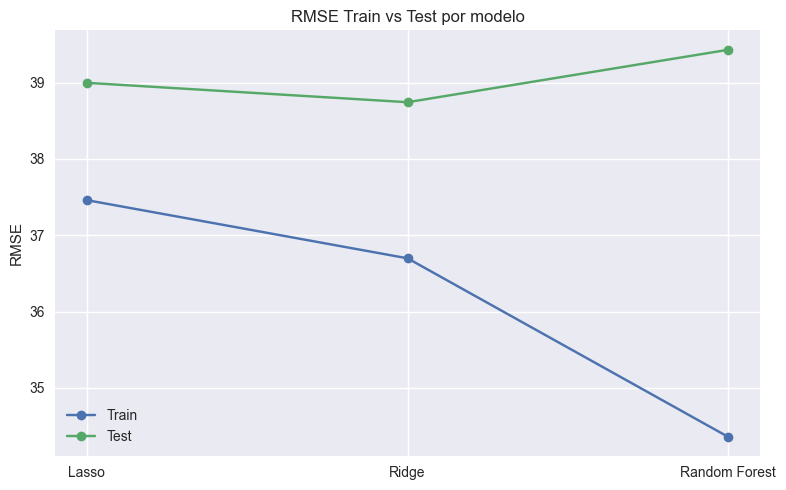

In [ ]:
#Comparación gráfica RMSE Train vs Test
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))

plt.plot(results_df['Modelo'], results_df['RMSE Train'], marker='o', label='Train')
plt.plot(results_df['Modelo'], results_df['RMSE Test'], marker='o', label='Test')

plt.ylabel('RMSE')
plt.title('RMSE Train vs Test por modelo')
plt.legend()
plt.tight_layout()
plt.show()
